# Лабораторная работа №7
Rejection Sampling и Metropolis Hastings для функций случайных величин

In [4]:
import math
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Биномиальное и Геометрическое распределение

In [276]:
def binomial_prob(m):
    p = 0.5
    n = 13
    return (math.factorial(n)/(math.factorial(int(m)) * math.factorial(n - int(m)))) * (p**int(m)) * ((1 - p)**(n - int(m)))

def geometric_prob(n):
    p = 0.3
    return (1 - p)**(n - 1) * p

# Rejection Sampling

In [277]:
def RS(n, f, a, b, h):
    x1 = []
    y1 = []
    x2 = []
    y2 = []

    for i in range(n):
        x = np.random.rand() * (b-a) + a
        y = np.random.rand() * h
        if y < f(x):
            x1.append(x)
            y1.append(y)
        else:
            x2.append(x)
            y2.append(y)
    return x1, y1, x2, y2

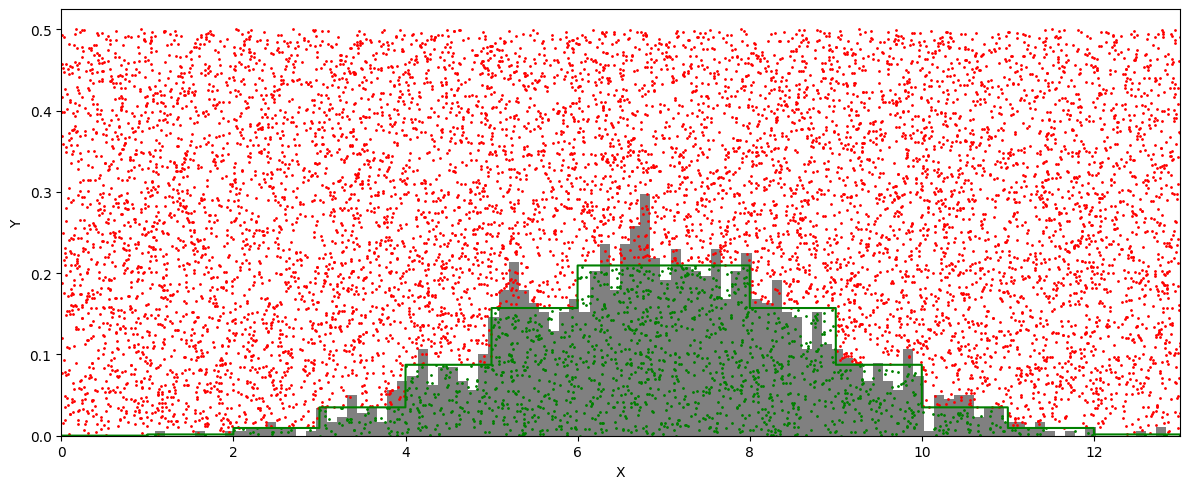

In [292]:
points_count = 10000
x = np.linspace(0, 13, points_count)
y = [binomial_prob(i) for i in x]
 
x1, y1, x2, y2 = RS(10000, binomial_prob, 0, 13, 0.5)

fig, ax = plt.subplots(figsize=(12,5))
ax.hist(x1, 100, density=True, color="grey")
ax.plot(x, y, color="green")
ax.scatter(x1, y1, s=1,color = "green")
ax.scatter(x2, y2, s=1, color = "red")
ax.set_xlim((0, 13))
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()
plt.show()

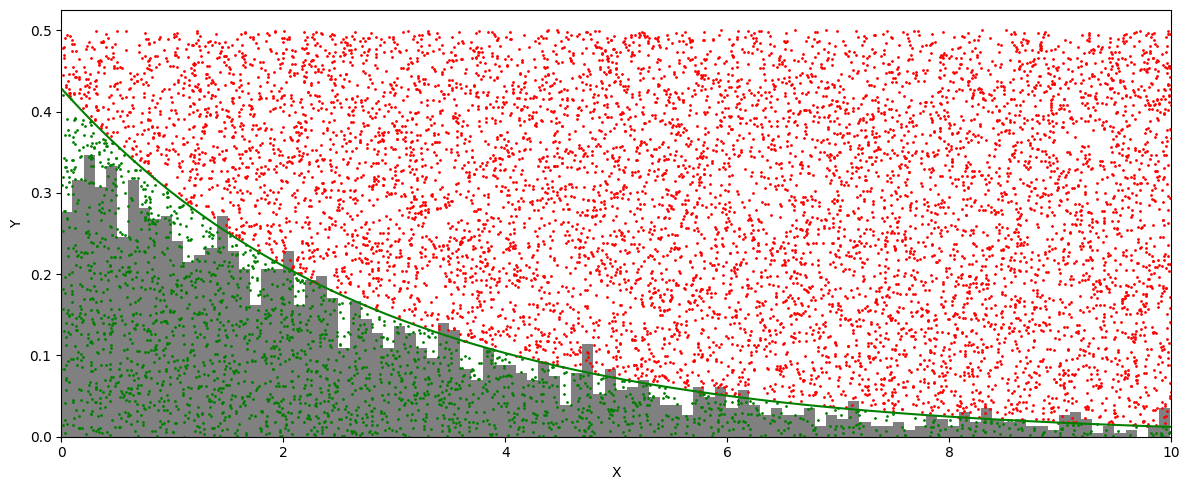

In [293]:
x = np.linspace(0, 10, points_count)
y = geometric_prob(x)

x1, y1, x2, y2 = RS(10000, geometric_prob, 0, 10, 0.5)

fig, ax = plt.subplots(figsize=(12,5))
ax.hist(x1, 100, density=True, color="grey")
ax.plot(x, y, color="green")
ax.scatter(x1, y1, s=1,color = "green") 
ax.scatter(x2, y2, s=1, color = "red")
ax.set_xlim((0, 10))
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()
plt.show()

In [445]:
def MH(n, x, f, m = None):
    x = [x]
    for i in range(n):
        x1 = x[-1]
        x2 = (np.random.rand() * m) if m != None else (abs(np.random.normal(x1)))
        a = f(x2)/f(x1)
        if np.random.rand() < a:
            x.append(x2)
        else:
            x.append(x1)
    return x

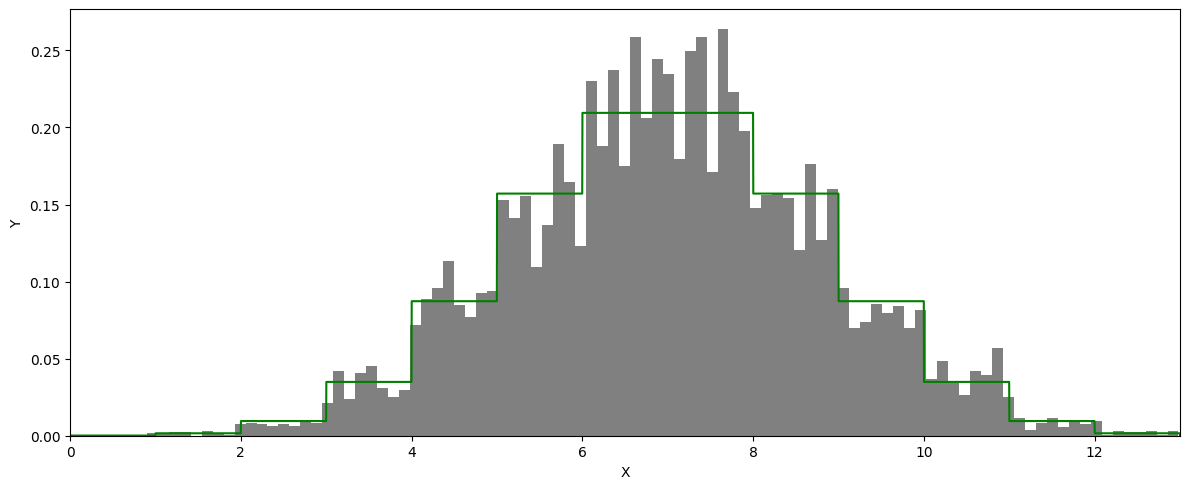

In [446]:
x = np.linspace(0, 13, points_count)
y = [binomial_prob(i) for i in x]
mh = MH(10000, 1, binomial_prob, 13)

fig, ax = plt.subplots(figsize=(12,5))
ax.hist(mh, 100, density=True, color="grey")
ax.plot(x, y, color="green")
ax.set_xlim((0, 13))
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()
plt.show()



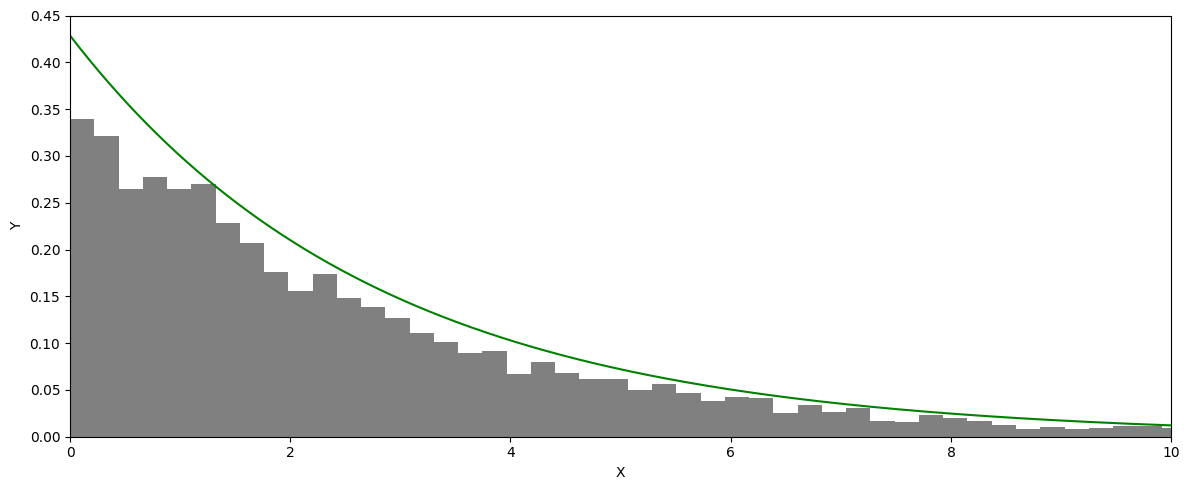

In [447]:


x = np.linspace(0, 10, points_count)
y = geometric_prob(x)
mh = MH(10000, 0, geometric_prob)
points = np.zeros((points_count))
fig, ax = plt.subplots(figsize=(12,5))
ax.hist(mh, 100, density=True, color="grey")
ax.plot(x, y, color="green")
ax.set_xlim((0, 10))
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()
plt.show()